In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Readin Dataset

In [8]:
df = pd.read_csv("china_gdp.csv")

Plotting the Dataset

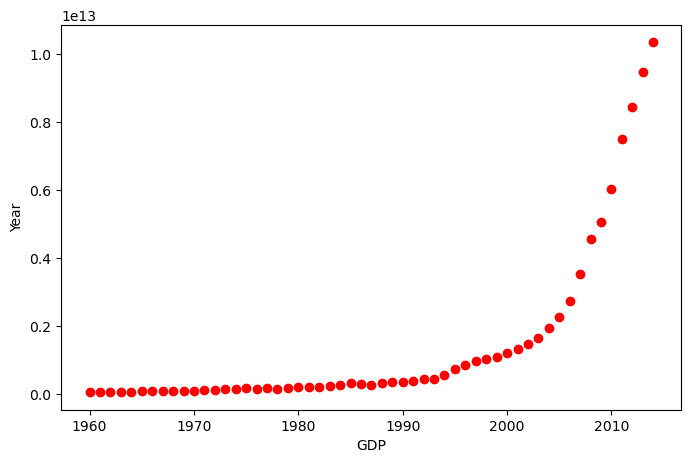

In [14]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.xlabel("GDP")
plt.ylabel("Year")
plt.show()

Choosing a model

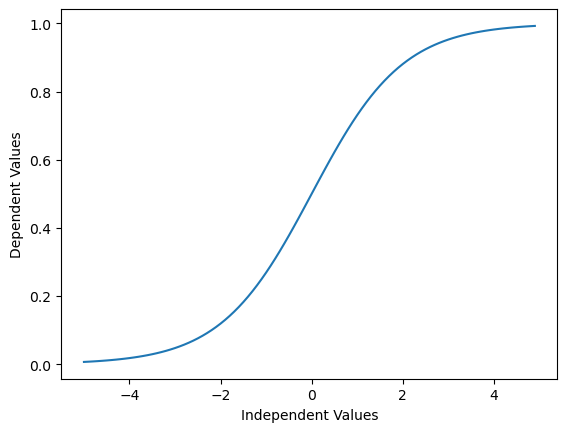

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1.0 / (1.0 + np.exp(-x))
plt.plot(x, y)
plt.ylabel("Dependent Values")
plt.xlabel("Independent Values")
plt.show()

Building The Model
The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.

In [32]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

Normalize Our Data

In [34]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

find the best parameters for our fit line

In [38]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


plot our resulting regression model

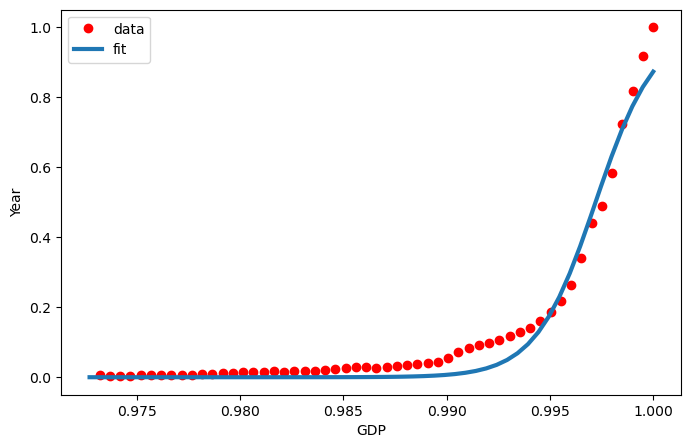

In [42]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.xlabel('GDP')
plt.ylabel('Year')
plt.show()